In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import lightning as L
from torch.utils.data import TensorDataset, DataLoader

import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Cheng Wen\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [7]:
class BasicLightning(L.LightningModule):
    def __init__(self):
        
        super().__init__()
        
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        # Initialise nn parameter weight w10, b10 and w11
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        # Final bias for RELU activation function
        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)
        
        
    def forward(self, input):
        
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
        
        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias
        
        output = F.relu(input_to_final_relu)
        return output

In [5]:
input_doses = torch.linspace(start=0, end=1, steps=11)
input_doses

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])

Text(0.5, 0, 'Dose')

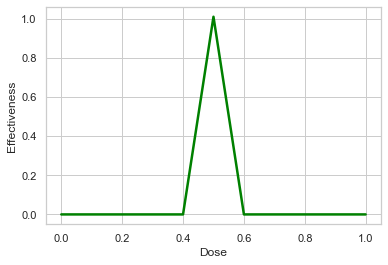

In [8]:
model = BasicLightning()
output_values = model(input_doses)

sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
            y=output_values,
            color='green',
            linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')

In [24]:
class BasicLightningTrain(L.LightningModule):
    
    def __init__(self):
        # Call initialisation method for the parent class
        super().__init__()
        # Initialise nn parameter weight w00, b00 and w01
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)
        
        # Initialise nn parameter weight w10, b10 and w11
        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)
        
        # Final bias for RELU activation function
        self.final_bias = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        
        self.learning_rate = 0.01
        
    # Define forward functions by piecing together weights and biases
    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01
        
        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11
    
    # Set up method to optimise neural network using SGD
    def configure_optimizers(self):
        return SGD(self.parameters(), lr=self.learning_rate)
    
    # Takes a batch of training data from the dataloader and calculates loss
    def training_step(self, batch, batch_idx):
         
        input_i, label_i = batch
        output_i = self.forward(input_i)
        loss = (output_i - label_i)**2
        
        return loss

In [31]:
# Train BasicNN_train() with input(x) and labels(y)
inputs = torch.tensor([0., 0.5, 1.])
labels = torch.tensor([0., 1., 0.])

dataset = TensorDataset(inputs, labels)
dataloader = DataLoader(dataset)

model = BasicLightningTrain()
trainer = L.Trainer(max_epochs=34)
tuner = Tuner(trainer)
lr_find_results = tuner.lr_find(model, 
                                train_dataloaders=dataloader,
                                min_lr=0.001,
                                max_lr=1.0,
                                early_stop_threshold=None)

new_lr = lr_find_results.suggestion()

print(f"lr_find() suggests {new_lr:.5f} for the learning rate.")

model.learning_rate = new_lr

trainer.fit(model,train_dataloaders=dataloader)
print(model.final_bias.data)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


NameError: name 'Tuner' is not defined

Text(0.5, 0, 'Dose')

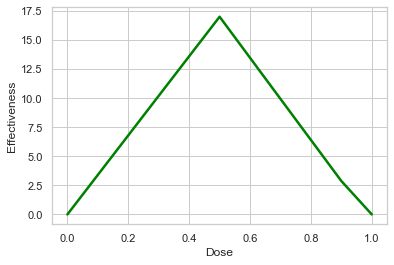

In [10]:
output_values = model(input_doses)

sns.set(style="whitegrid")
sns.lineplot(x=input_doses,
            y=output_values,
            color='green',
            linewidth=2.5)
plt.ylabel('Effectiveness')
plt.xlabel('Dose')